# ripe or rotten mango?

In this section, we import the necessary libraries to handle file operations, numerical computations, data processing, visualization, and image handling.

In [65]:
# Reload modules before executing cells
%reload_ext autoreload
%autoreload 2

In [66]:
# Import required packages
import os  # For working with file paths
import cv2  # For image processing
import numpy as np  # For linear algebra operations
import pandas as pd  # For data processing and manipulation
import matplotlib.pyplot as plt  # For data visualization
from PIL import Image  # For loading image data
from random import sample # For random sampling

from dataset import MangoDataset # For loading dataset
from images import MangoManager, MangoImage # For image processing

Here, we initialize the MangoDataset and create a DataFrame that contains the image labels and filenames.

In [73]:
# Define the path and train and validation sets
path, train_set, validation_set = MangoDataset()
image_df = pd.DataFrame(train_set, columns=["label", "filename"])
print(image_df)

       label              filename
0       Ripe                 1.jpg
1       Ripe                10.jpg
2       Ripe              1000.jpg
3       Ripe               102.jpg
4       Ripe               103.jpg
...      ...                   ...
1984  Rotten  rottenMango (95).jpg
1985  Rotten  rottenMango (96).jpg
1986  Rotten  rottenMango (97).jpg
1987  Rotten  rottenMango (98).jpg
1988  Rotten  rottenMango (99).jpg

[1989 rows x 2 columns]


In [68]:
# Create the image manager and process the images
mng = MangoManager(path)

processed_images = [mng.create_image(image) for image in train_set]
features_df = pd.DataFrame([dict(image) for image in processed_images])
print(features_df)

       label    0      1      2      3     4      5      6      7     8  ...  \
0       Ripe  0.0   40.0  114.0  121.0  51.0   10.0    7.0    6.0   4.0  ...   
1       Ripe  0.0  133.0   82.0   17.0  11.0    9.0    7.0    5.0   6.0  ...   
2       Ripe  0.0   52.0   29.0   25.0  28.0    7.0    2.0    7.0   7.0  ...   
3       Ripe  0.0    8.0    1.0    1.0  40.0  133.0  229.0  198.0  81.0  ...   
4       Ripe  0.0    5.0    5.0    4.0   2.0    0.0    1.0    2.0   3.0  ...   
...      ...  ...    ...    ...    ...   ...    ...    ...    ...   ...  ...   
1984  Rotten  0.0  237.0  203.0   60.0  23.0    1.0   29.0    9.0  20.0  ...   
1985  Rotten  0.0   17.0   22.0   22.0  42.0   39.0   34.0   35.0   8.0  ...   
1986  Rotten  0.0   16.0    4.0   39.0  25.0   14.0   29.0   12.0  12.0  ...   
1987  Rotten  0.0   18.0    6.0    9.0  10.0   41.0   23.0   19.0  11.0  ...   
1988  Rotten  0.0   20.0   10.0   35.0   2.0   37.0   21.0   18.0  10.0  ...   

      4854  4855  4856  4857  4858  485

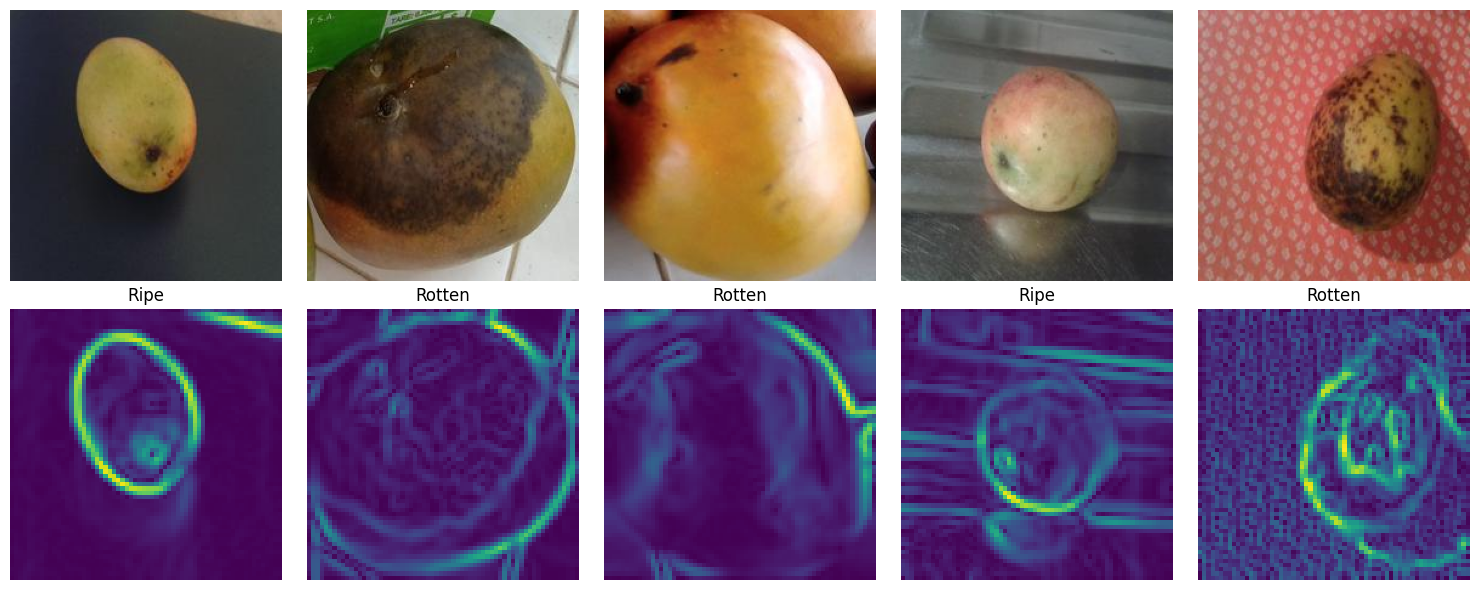

In [69]:
# Function to show sample images
def show_samples(processed_images, train_set, num_samples=5):
    num_samples = min(num_samples, len(processed_images))

    indices = sample(range(len(processed_images)), num_samples)
    selected_images = [(train_set[i], processed_images[i]) for i in indices]

    fig, axes = plt.subplots(2, num_samples, figsize=(15, 6))

    for ax, (orig_img, proc_img) in zip(axes[0], selected_images):
        ax.imshow(MangoImage.load("train", orig_img))
        ax.axis("off")

    for ax, (orig_img, proc_img) in zip(axes[1], selected_images):
        ax.set_title(proc_img.label)
        ax.imshow(proc_img.edges)
        ax.axis("off")

    plt.tight_layout()
    plt.show()


show_samples(processed_images, train_set)